In [2]:
# Necessary Libraries

import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
#Load the Logs
logs =("csic_database.csv")
print(f"\nLoading the Web logs from {logs}")
df=pd.read_csv(logs)


Loading the Web logs from csic_database.csv


In [3]:

print("\nScheme Overview:\n",df.info)
# Check missing values
print(df.isnull().sum())

# Distribution of labels
print(df["classification"].value_counts())



Scheme Overview:
 <bound method DataFrame.info of       Unnamed: 0 Method                                         User-Agent  \
0         Normal    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
1         Normal    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
2         Normal   POST  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
3         Normal    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
4         Normal   POST  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
...          ...    ...                                                ...   
61060  Anomalous    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
61061  Anomalous   POST  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
61062  Anomalous    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
61063  Anomalous    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   
61064  Anomalous    GET  Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...   

         Pra

In [7]:
#Feature Extraction
# Actual column names
print(df.columns)

# Use the correct column (replace "URL" with yours if needed)
df["url_length"] = df["URL"].str.len()
df["num_question_marks"] = df["URL"].str.count(r"\?")
df["num_equals"] = df["URL"].str.count("=")
df["num_percent"] = df["URL"].str.count("%")
df["num_slash"] = df["URL"].str.count("/")
df["num_special"] = df["URL"].str.count(r"[@#$&]")

# Handle missing values
if "content_length" in df.columns:
    df["content_length"] = df["content_length"].fillna(0)

# Drop unused
df = df.drop(columns=["cookie"], errors="ignore")


print("✅ Feature engineering complete:", df.shape)

Index(['Unnamed: 0', 'Method', 'User-Agent', 'Pragma', 'Cache-Control',
       'Accept', 'Accept-encoding', 'Accept-charset', 'language', 'host',
       'content-type', 'connection', 'lenght', 'content', 'classification',
       'URL', 'url_length', 'num_question_marks', 'num_equals', 'num_percent',
       'num_slash', 'num_special'],
      dtype='object')
✅ Feature engineering complete: (61065, 22)


In [12]:
from sklearn.preprocessing import LabelEncoder

# Convert classification into numbers (0 = Normal, 1 = Anomalous)
if df["classification"].dtype == 'object':
    df["classification"] = df["classification"].map({"Normal": 0, "Anomalous": 1})

# Encode all non-numeric columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

print("✅ All categorical columns encoded.")


✅ All categorical columns encoded.


In [13]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop(columns=["classification"])
y = df["classification"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (48852, 21) Test: (12213, 21)


In [14]:
#  Model Training (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Anomalous"]))


📊 Confusion Matrix:
[[7148    0]
 [   0 5065]]

📊 Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      7148
   Anomalous       1.00      1.00      1.00      5065

    accuracy                           1.00     12213
   macro avg       1.00      1.00      1.00     12213
weighted avg       1.00      1.00      1.00     12213



In [15]:
#  Save Results
df_results = X_test.copy()
df_results["true_label"] = y_test
df_results["predicted"] = y_pred

df_results.to_csv("csic2010_predictions.csv", index=False)
print("💾 Results saved to csic2010_predictions.csv")


💾 Results saved to csic2010_predictions.csv


In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.91451732 0.91803816 0.91320724 0.9162368  0.91361664]
Mean accuracy: 0.9151232293457789


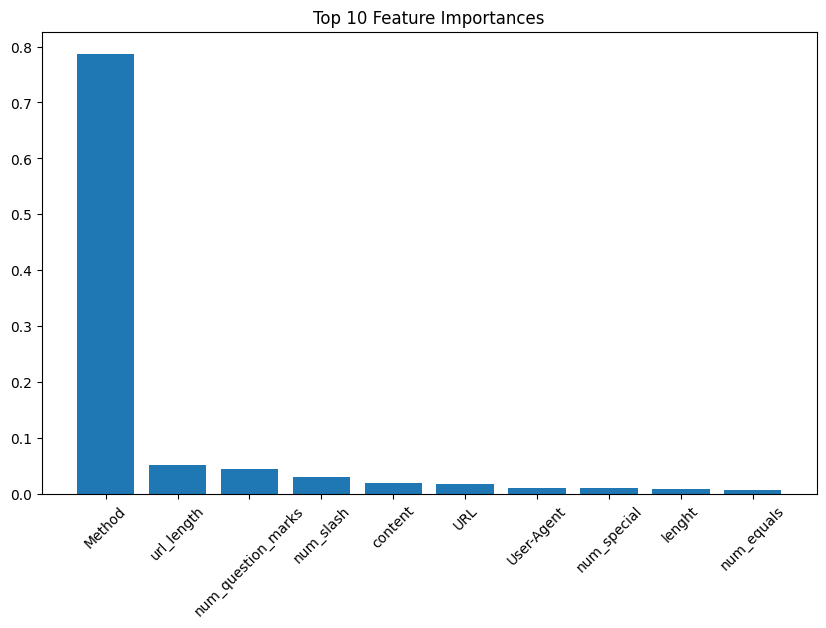

In [30]:
import matplotlib.pyplot as plt
import numpy as np
top_n = 10
plt.figure(figsize=(10,6))
plt.bar(range(top_n), importances[indices[:top_n]], align="center")
plt.xticks(range(top_n), feature_names[indices[:top_n]], rotation=45)
plt.title("Top 10 Feature Importances")
plt.show()


In [5]:
df=pd.read_csv("csic2010_predictions.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12213 entries, 0 to 12212
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          12213 non-null  int64
 1   Method              12213 non-null  int64
 2   User-Agent          12213 non-null  int64
 3   Pragma              12213 non-null  int64
 4   Cache-Control       12213 non-null  int64
 5   Accept              12213 non-null  int64
 6   Accept-encoding     12213 non-null  int64
 7   Accept-charset      12213 non-null  int64
 8   language            12213 non-null  int64
 9   host                12213 non-null  int64
 10  content-type        12213 non-null  int64
 11  connection          12213 non-null  int64
 12  lenght              12213 non-null  int64
 13  content             12213 non-null  int64
 14  URL                 12213 non-null  int64
 15  url_length          12213 non-null  int64
 16  num_question_marks  12213 non-null  int6